In [1]:
import os
import cv2 
import numpy as np
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

from keras.preprocessing import image


Using TensorFlow backend.


In [2]:
CUDA_VISIBLE_DEVICES = 1

In [3]:
images = []

img_path = r'C:\Users\melte\Desktop\Cluster_Data\Frauen'
# img_path = r'C:\Users\melte\Desktop\Cluster_Data\Men'
listImgs = os.listdir(img_path)
img_size = 224

# LOAD IN THE IMAGES
for k in range(0,len(listImgs)):
    img = cv2.imread(('\\'.join([img_path,listImgs[k]])).format(img_path),-1)
    GRAY = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(GRAY)

    pass 

n = len(images)

images = np.array(images)

#flatten arrays for further processing 
images = images.reshape(n, img_size*img_size)

In [4]:
from sklearn.decomposition import PCA 
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler

#defining components based on % of all components 
c1 = int(n*0.8)
c2 = int(n*0.5)
c3 = int(n*0.2)

#Scaling the input
scaler = StandardScaler().fit(images)
images_s = scaler.transform(images)

mu = np.mean(images_s, axis=0)

#No. of principal components 
n_components = c2

#___________________________________________________________________________
# LINEAR PCA
pca = PCA(n_components=n_components)
pca.fit(images_s)

images_r = np.dot(pca.transform(images_s), pca.components_)
images_r += mu

print(n_components," Components explain ", np.amax((np.cumsum(pca.explained_variance_ratio_ ))*100),"% of the variance")


C:\Users\melte\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\melte\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


100  Components explain  94.85034278810124 % of the variance


## k-means / HAC

In [5]:
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering, AgglomerativeClustering

predict = KMeans(n_clusters=10, random_state=0).fit_predict(images_r)

# #linkage : {“ward”, “complete”, “average”, “single”}
# predict = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
#             connectivity=None, linkage='ward', memory=None, n_clusters=100,
#             pooling_func='deprecated').fit_predict(images_r)

# print(predict)

In [6]:
#Let's generate the 10 Clusters and store the corresponding image labels in them
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []

members0 = []
members1 = []
members2 = []
members3 = []
members4 = []
members5 = []
members6 = []
members7 = []
members8 = []
members9 = []


for i in range (200): 
    if (predict[i] == 0): 
        cluster0.append(images[i])
        members0.append(listImgs[i])
        
    elif (predict[i] == 1): 
        cluster1.append(images[i])
        members1.append(listImgs[i])
        
    elif (predict[i] == 2): 
        cluster2.append(images[i])
        members2.append(listImgs[i])
        
    elif (predict[i] == 3): 
        cluster3.append(images[i])
        members3.append(listImgs[i])
        
    elif (predict[i] == 4): 
        cluster4.append(images[i])
        members4.append(listImgs[i])
        
    elif (predict[i] == 5): 
        cluster5.append(images[i])
        members5.append(listImgs[i])
        
    elif (predict[i] == 6): 
        cluster6.append(images[i])
        members6.append(listImgs[i])
        
    elif (predict[i] == 7): 
        cluster7.append(images[i])
        members7.append(listImgs[i])
        
    elif (predict[i] == 8): 
        cluster8.append(images[i])
        members8.append(listImgs[i])
        
    elif (predict[i] == 9): 
        cluster9.append(images[i])
        members9.append(listImgs[i])
        pass
    pass 

n_cluster0 = len(cluster0)
n_cluster1 = len(cluster1)
n_cluster2 = len(cluster2)
n_cluster3 = len(cluster3)
n_cluster4 = len(cluster4)
n_cluster5 = len(cluster5)
n_cluster6 = len(cluster6)
n_cluster7 = len(cluster7)
n_cluster8 = len(cluster8)
n_cluster9 = len(cluster9)


cluster0 = np.array(cluster0)
cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)
cluster4 = np.array(cluster4)
cluster5 = np.array(cluster5)
cluster6 = np.array(cluster6)
cluster7 = np.array(cluster7)
cluster8 = np.array(cluster8)
cluster9 = np.array(cluster9)

In [7]:
print("Number of elements in Cluster 0: ", n_cluster0, "\nElement names: ", members0, 
     "\n\nNumber of elements in Cluster 1: ", n_cluster1, "\nElement names: ", members1, 
     "\n\nNumber of elements in Cluster 2: ", n_cluster2, "\nElement names: ", members2, 
     "\n\nNumber of elements in Cluster 3: ", n_cluster3, "\nElement names: ", members3, 
     "\n\nNumber of elements in Cluster 4: ", n_cluster4, "\nElement names: ", members4, 
     "\n\nNumber of elements in Cluster 5: ", n_cluster5, "\nElement names: ", members5, 
     "\n\nNumber of elements in Cluster 6: ", n_cluster6, "\nElement names: ", members6, 
     "\n\nNumber of elements in Cluster 7: ", n_cluster7, "\nElement names: ", members7, 
     "\n\nNumber of elements in Cluster 8: ", n_cluster8, "\nElement names: ", members8, 
     "\n\nNumber of elements in Cluster 9: ", n_cluster9, "\nElement names: ", members9)


Number of elements in Cluster 0:  5 
Element names:  ['fCW (3).jpg', 'fMM (14).jpg', 'fMW (17).jpg', 'fSM (15).jpg', 'fSW (15).jpg'] 

Number of elements in Cluster 1:  25 
Element names:  ['fCM (1).jpg', 'fCM (20).jpg', 'fCM (4).jpg', 'fCW (11).jpg', 'fFM (12).jpg', 'fFM (16).jpg', 'fFW (15).jpg', 'fMM (13).jpg', 'fMM (20).jpg', 'fMM (3).jpg', 'fMM (5).jpg', 'fMM (8).jpg', 'fMW (7).jpg', 'fPM (1).jpg', 'fPM (4).jpg', 'fPW (17).jpg', 'fPW (3).jpg', 'fPW (8).jpg', 'fPW (9).jpg', 'fSM (3).jpg', 'fSM (7).jpg', 'fSW (12).jpg', 'fSW (14).jpg', 'fSW (17).jpg', 'fSW (3).jpg'] 

Number of elements in Cluster 2:  22 
Element names:  ['fCM (10).jpg', 'fCM (16).jpg', 'fCM (19).jpg', 'fCW (19).jpg', 'fFM (13).jpg', 'fFM (2).jpg', 'fFW (6).jpg', 'fMM (11).jpg', 'fMM (2).jpg', 'fMW (14).jpg', 'fMW (19).jpg', 'fPM (11).jpg', 'fPM (13).jpg', 'fPM (5).jpg', 'fPM (6).jpg', 'fPM (9).jpg', 'fPW (19).jpg', 'fSM (16).jpg', 'fSM (20).jpg', 'fSM (5).jpg', 'fSW (5).jpg', 'fSW (9).jpg'] 

Number of elements in 

In [8]:
#define a get value class for simple export to Excel or SPSS

def getvalues(members):

#     mCW, mCM, mMW, mMM, mFW, mFM, mPW, mPM, mSW, mSM = 0,0,0,0,0,0,0,0,0,0

#     for i in members:
#         if "mCW" in i: 
#             mCW += 1

#         elif "mCM" in i: 
#             mCM += 1

#         elif "mMW" in i: 
#             mMW += 1

#         elif "mMM" in i: 
#             mMM += 1

#         elif "mFW" in i: 
#             mFW += 1

#         elif "mFM" in i: 
#             mFM += 1

#         elif "mPW" in i: 
#             mPW += 1

#         elif "mPM" in i: 
#             mPM += 1

#         elif "mSW" in i: 
#             mSW += 1

#         elif "mSM" in i: 
#             mSM += 1

#             pass
#         pass

#     return(mCW, mCM, mMW, mMM, mFW, mFM, mPW, mPM, mSW, mSM)
    
    fCW, fCM, fMW, fMM, fFW, fFM, fPW, fPM, fSW, fSM = 0,0,0,0,0,0,0,0,0,0

    for i in members:
        if "fCW" in i: 
            fCW += 1

        elif "fCM" in i: 
            fCM += 1

        elif "fMW" in i: 
            fMW += 1

        elif "fMM" in i: 
            fMM += 1

        elif "fFW" in i: 
            fFW += 1

        elif "fFM" in i: 
            fFM += 1

        elif "fPW" in i: 
            fPW += 1

        elif "fPM" in i: 
            fPM += 1

        elif "fSW" in i: 
            fSW += 1

        elif "fSM" in i: 
            fSM += 1

            pass
        pass

    return(fCW, fCM, fMW, fMM, fFW, fFM, fPW, fPM, fSW, fSM)


classes0 = getvalues(members0)
classes1 = getvalues(members1)
classes2 = getvalues(members2)
classes3 = getvalues(members3)
classes4 = getvalues(members4)
classes5 = getvalues(members5)
classes6 = getvalues(members6)
classes7 = getvalues(members7)
classes8 = getvalues(members8)
classes9 = getvalues(members9)

print(classes0, "\n",
     classes1,"\n",
     classes2,"\n",
     classes3,"\n",
     classes4,"\n",
     classes5,"\n",
     classes6,"\n",
     classes7,"\n",
     classes8,"\n",
     classes9)

(1, 0, 1, 1, 0, 0, 0, 0, 1, 1) 
 (1, 3, 1, 5, 1, 2, 4, 2, 4, 2) 
 (1, 3, 2, 2, 1, 2, 1, 5, 2, 3) 
 (3, 1, 6, 5, 6, 7, 4, 1, 0, 0) 
 (1, 2, 1, 2, 1, 1, 2, 0, 1, 1) 
 (1, 1, 1, 2, 1, 1, 1, 2, 2, 4) 
 (4, 0, 4, 1, 3, 3, 4, 4, 2, 1) 
 (3, 3, 1, 1, 1, 2, 1, 2, 3, 5) 
 (4, 4, 1, 1, 5, 1, 0, 4, 2, 0) 
 (1, 3, 2, 0, 1, 1, 3, 0, 3, 3)


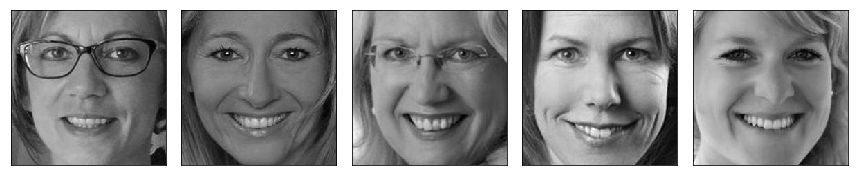

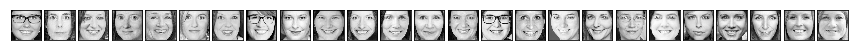

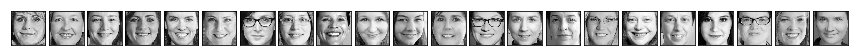

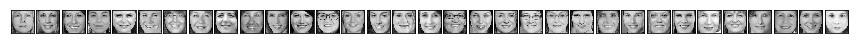

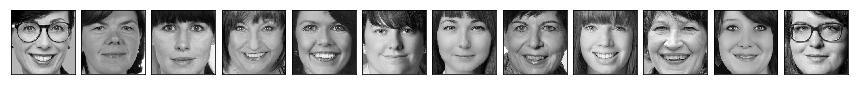

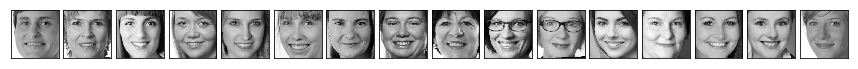

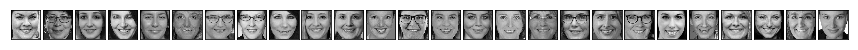

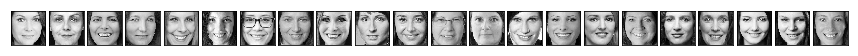

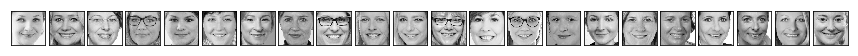

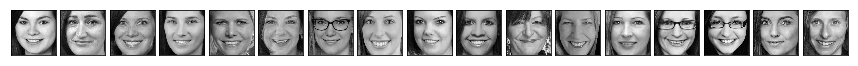

In [9]:
cluster0 = cluster0.reshape(n_cluster0,224,224)
cluster1 = cluster1.reshape(n_cluster1,224,224)
cluster2 = cluster2.reshape(n_cluster2,224,224)
cluster3 = cluster3.reshape(n_cluster3,224,224)
cluster4 = cluster4.reshape(n_cluster4,224,224)
cluster5 = cluster5.reshape(n_cluster5,224,224)
cluster6 = cluster6.reshape(n_cluster6,224,224)
cluster7 = cluster7.reshape(n_cluster7,224,224)
cluster8 = cluster8.reshape(n_cluster8,224,224)
cluster9 = cluster9.reshape(n_cluster9,224,224)


#Plotting Clusters

fig, axes = plt.subplots(1, n_cluster0, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster0[i], cmap='gray')
    pass


fig, axes = plt.subplots(1, n_cluster1, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster1[i], cmap='gray')
    pass


fig, axes = plt.subplots(1, n_cluster2, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster2[i], cmap='gray')
    pass

fig, axes = plt.subplots(1, n_cluster3, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster3[i], cmap='gray')
    pass


fig, axes = plt.subplots(1, n_cluster4, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster4[i], cmap='gray')
    pass


fig, axes = plt.subplots(1, n_cluster5, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster5[i], cmap='gray')
    pass


fig, axes = plt.subplots(1, n_cluster6, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster6[i], cmap='gray')
    pass


fig, axes = plt.subplots(1, n_cluster7, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster7[i], cmap='gray')
    pass


fig, axes = plt.subplots(1, n_cluster8, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster8[i], cmap='gray')
    pass


fig, axes = plt.subplots(1, n_cluster9, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(cluster9[i], cmap='gray')
    pass

In [10]:
# # EXAMPLE CLUSTER 
# fig, axes = plt.subplots(4,4, figsize=(15, 10),
#                          subplot_kw={'xticks':[], 'yticks':[]},
#                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(cluster9[i], cmap='bone')
#     pass



In [11]:
# # Visualize the results on PCA-reduced data
# from sklearn.decomposition import PCA 
# from sklearn.preprocessing import scale

# reduced_data = PCA(n_components=2).fit_transform(embedding)
# kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
# kmeans.fit(reduced_data)

# # Step size of the mesh. Decrease to increase the quality of the VQ.
# h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
# y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Obtain labels for each point in mesh. Use last trained model.
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1)
# plt.clf()
# plt.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
# plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()